## Pandas basic

来自《深入浅出pandas》

## 一、数据查看及验证

In [4]:
import pandas as pd
df = pd.read_excel('resources/team.xlsx')

# 随机查看5条
df.sample(5)

,name,team,Q1,Q2,Q3,Q4
7,Lfie,A,9,10,99,37
53,Frankie,B,18,62,52,33
97,Lincoln4,C,98,93,1,20
56,David,B,21,47,99,2
91,Connor,C,62,38,63,46


In [10]:
# 验证数据
df.shape    # 查看行数和列数，output: (100, 6)

df.info()   # 查看索引、数据类型、内存信息

# output:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 100 entries, 0 to 99
# Data columns (total 6 columns):
#  #   Column  Non-Null Count  Dtype 
# ---  ------  --------------  ----- 
#  0   name    100 non-null    object
#  1   team    100 non-null    object
#  2   Q1      100 non-null    int64 
#  3   Q2      100 non-null    int64 
#  4   Q3      100 non-null    int64 
#  5   Q4      100 non-null    int64 
# dtypes: int64(4), object(2)
# memory usage: 4.8+ KB

df.describe()   # 汇总统计
df.dtypes       # 查看各字段类型
df.axes         # 显示数据行和列
df.columns      # 显示列名

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    100 non-null    object
 1   team    100 non-null    object
 2   Q1      100 non-null    int64 
 3   Q2      100 non-null    int64 
 4   Q3      100 non-null    int64 
 5   Q4      100 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


Index(['name', 'team', 'Q1', 'Q2', 'Q3', 'Q4'], dtype='object')

In [13]:
# 建立索引
df.set_index('name', inplace=True)
df.head()

,team,Q1,Q2,Q3,Q4
name,,,,,
Liver,E,89,21,24,64
Arry,C,36,37,37,57
Ack,A,57,60,18,84
Eorge,C,93,96,71,78
Oah,D,65,49,61,86


### 二、数据选取

`df.loc[x, y]`是一个非常强大的数据选择函数，其中x代表行，y代表列，行和列都支持条件表达式，也支持类似列表那样的切片

In [33]:
# ------------ （1）选择列 ------------
df[['team', 'Q1']]
df.loc[:, ['team', 'Q1']]
# 两者等效

# ------------ （2）选择行 ------------
# 1.指定索引
df[df.index == 'Ben']
# 2.用自然索引，类似切片
df[0:3]     # 取前三行
df[0:10:2]  # 在前10个以2个步长取行
df.iloc[:3, :] #前10个, iloc用于自然索引


# ------------ （3）选择行和列 ------------
df.loc['Ben', 'Q1':'Q3']        # 只看Ben,Q1~Q3成绩
df.loc['Eorge':'Lfie', 'Q1':'Q3'] # 指定行区间, 从 Eorge~Life（行），Q1~Q3(列) , 注意必须有序的


# ------------ （4）条件选择 ------------
df[ (df['Q1'] > 90) & (df['team'] == 'C') ]     # and 条件
df[df['team'] == 'C'].loc[df.Q1 > 90]           # 多重筛选

,team,Q1,Q2,Q3,Q4
name,,,,,
Eorge,C,93,96,71,78
Alexander,C,91,76,26,79
Lincoln4,C,98,93,1,20


## 三、排序
`df.sort_values()` 方法

In [36]:
df.sort_values(by='Q1')                         # 按Q1列升序
df.sort_values(by='Q1', ascending=False)        # 按Q1列降序

df.sort_values(by=['team', 'Q1'], ascending=[True, False])        # 按team升序，Q1降序

,team,Q1,Q2,Q3,Q4
name,,,,,
Aaron,A,96,75,55,8
Henry,A,91,15,75,17
Nathan,A,87,77,62,13
Dylan,A,86,87,65,20
Blake,A,78,23,93,9
...,...,...,...,...,...
Eli,E,11,74,58,91
Jude,E,8,45,13,65
Rory9,E,8,12,58,27


## 四、分组聚合
`df.groupby()`方法

In [38]:
df.groupby('team').mean()       # 按team分组聚合求平均
df.groupby('team').agg({
    'Q1': sum,
    'Q2': 'count',
    'Q3': 'mean',
    'Q4': 'max'
})

,Q1,Q2,Q3,Q4
team,,,,
A,1066,17,51.470588,97
B,975,22,54.636364,99
C,1056,22,48.545455,98
D,860,19,65.315789,99
E,963,20,44.050000,98


In [40]:
## -------- 数据转换 ---------
df.groupby('team').agg({
    'Q1': sum,
    'Q2': 'count',
    'Q3': 'mean',
    'Q4': 'max'
}).T        # 翻转

team,A,B,C,D,E
Q1,1066.000000,975.000000,1056.000000,860.000000,963.00
Q2,17.000000,22.000000,22.000000,19.000000,20.00
Q3,51.470588,54.636364,48.545455,65.315789,44.05
Q4,97.000000,99.000000,98.000000,99.000000,98.00


In [42]:
df.groupby('team').mean().stack()
df.groupby('team').mean().unstack()


    team
Q1  A       62.705882
    B       44.318182
    C       48.000000
    D       45.263158
    E       48.150000
Q2  A       37.588235
    B       55.363636
    C       54.272727
    D       62.684211
    E       50.650000
Q3  A       51.470588
    B       54.636364
    C       48.545455
    D       65.315789
    E       44.050000
Q4  A       46.058824
    B       51.636364
    C       51.227273
    D       63.105263
    E       51.650000
dtype: float64

## 五、增减列

In [43]:
df['total'] = df.Q1 + df.Q2 + df.Q3 + df.Q4         # 增加总成绩
df.head()

,team,Q1,Q2,Q3,Q4,total
name,,,,,,
Liver,E,89,21,24,64,198
Arry,C,36,37,37,57,167
Ack,A,57,60,18,84,219
Eorge,C,93,96,71,78,338
Oah,D,65,49,61,86,261


## 六、简单分析


/var/folders/_k/xy4klxnx7r158yck04m7yy580000gn/T/ipykernel_35928/2620421542.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()   # 返回所有列的均值
/var/folders/_k/xy4klxnx7r158yck04m7yy580000gn/T/ipykernel_35928/2620421542.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(1)  # 返回所有行的均值，下同


<AxesSubplot:ylabel='Q1'>

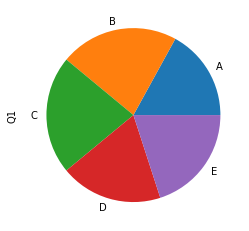

In [58]:
df.mean()   # 返回所有列的均值
df.mean(1)  # 返回所有行的均值，下同

df.corr()   # 返回列与列之间相关系数

# df['Q1'].plot()
# df.loc['Ben', 'Q1':'Q4'].plot()  # ben 四个季度的成绩变化曲线
# df.loc['Ben', 'Q1':'Q4'].plot.bar()  # ben 四个季度的成绩变化柱状图
# df.loc['Ben', 'Q1':'Q4'].plot.barh()  # ben 四个季度的成绩变化柱横向状图
# df.groupby('team').sum().T.plot()  # 各Team四个季度总成绩趋势
df.groupby('team').count().Q1.T.plot.pie()  # 各组人数对比饼图